### 0. Load libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from helper_functions_SDG import *

### 1. Load data

In [2]:
admissions_df = pd.read_csv('./data/bar_pass_prediction.csv')
print(admissions_df.shape)
print(admissions_df.columns)
print(admissions_df.isnull().sum())
display(admissions_df.head())

(22407, 39)
Index(['decile1b', 'decile3', 'ID', 'decile1', 'sex', 'race', 'cluster',
       'lsat', 'ugpa', 'zfygpa', 'DOB_yr', 'grad', 'zgpa', 'bar1', 'bar1_yr',
       'bar2', 'bar2_yr', 'fulltime', 'fam_inc', 'age', 'gender', 'parttime',
       'male', 'race1', 'race2', 'Dropout', 'other', 'asian', 'black', 'hisp',
       'pass_bar', 'bar', 'bar_passed', 'tier', 'index6040', 'indxgrp',
       'indxgrp2', 'dnn_bar_pass_prediction', 'gpa'],
      dtype='object')
decile1b                   1604
decile3                    1604
ID                            0
decile1                    1092
sex                           5
race                         16
cluster                      96
lsat                          0
ugpa                          0
zfygpa                      984
DOB_yr                       50
grad                          3
zgpa                       1289
bar1                          0
bar1_yr                      39
bar2                          0
bar2_yr             

,decile1b,decile3,ID,decile1,sex,race,cluster,lsat,ugpa,zfygpa,...,hisp,pass_bar,bar,bar_passed,tier,index6040,indxgrp,indxgrp2,dnn_bar_pass_prediction,gpa
0,10.0,10.0,2,10.0,1.0,7.0,1.0,44.0,3.5,1.33,...,0,1,a Passed 1st time,True,4.0,886.842082,g 700+,i 820+,0.979804,3.5
1,5.0,4.0,3,5.0,1.0,7.0,2.0,29.0,3.5,-0.11,...,0,1,a Passed 1st time,True,2.0,649.999987,f 640-700,f 640-700,0.979804,3.5
2,3.0,2.0,36,3.0,2.0,7.0,3.0,36.0,3.5,-0.64,...,0,1,a Passed 1st time,True,3.0,760.526298,g 700+,h 760-820,0.979804,3.5
3,7.0,4.0,52,7.0,2.0,7.0,3.0,39.0,3.5,0.34,...,0,1,a Passed 1st time,True,3.0,807.894717,g 700+,h 760-820,0.979804,3.5
4,9.0,8.0,55,9.0,2.0,7.0,4.0,48.0,3.5,1.02,...,0,1,a Passed 1st time,True,5.0,949.999974,g 700+,i 820+,0.979804,3.5


### 2. Data cleaning
For a minimal working example of generating synthetic data, we will only look at the following variables:

- race - Categorizes students by race. Of all the race variables this was the most complete, so it’s the one I kept. All the information contained in the other race variables are contained in race1.
- sex - student gender
- gpa - grade point average (GPA), sum of all your course grades throughout your high school career divided by the total number of credits

In [3]:
admissions_sub = admissions_df[['sex', 'race', 'gpa']]


In [4]:
# Remove all rows with missing values
real_data = admissions_sub.dropna()
print(real_data.shape)
print(real_data.isnull().sum())

(22387, 3)
sex     0
race    0
gpa     0
dtype: int64


In [5]:
real_data

,sex,race,gpa
0,1.0,7.0,3.5
1,1.0,7.0,3.5
2,2.0,7.0,3.5
3,2.0,7.0,3.5
4,2.0,7.0,3.5
...,...,...,...
22402,2.0,3.0,1.8
22403,2.0,3.0,1.8
22404,2.0,3.0,1.8
22405,2.0,7.0,1.5


### 3. Explanatory data analysis

In [6]:
# Select only the categorical columns
categorical_columns = real_data.select_dtypes(include=['object'])

# Loop through each categorical column and print value counts
for column in categorical_columns.columns:
    print(f"Value counts for column '{column}':")
    print(admissions_sub_cleaned[column].value_counts())
    print()

#### Correlation plot

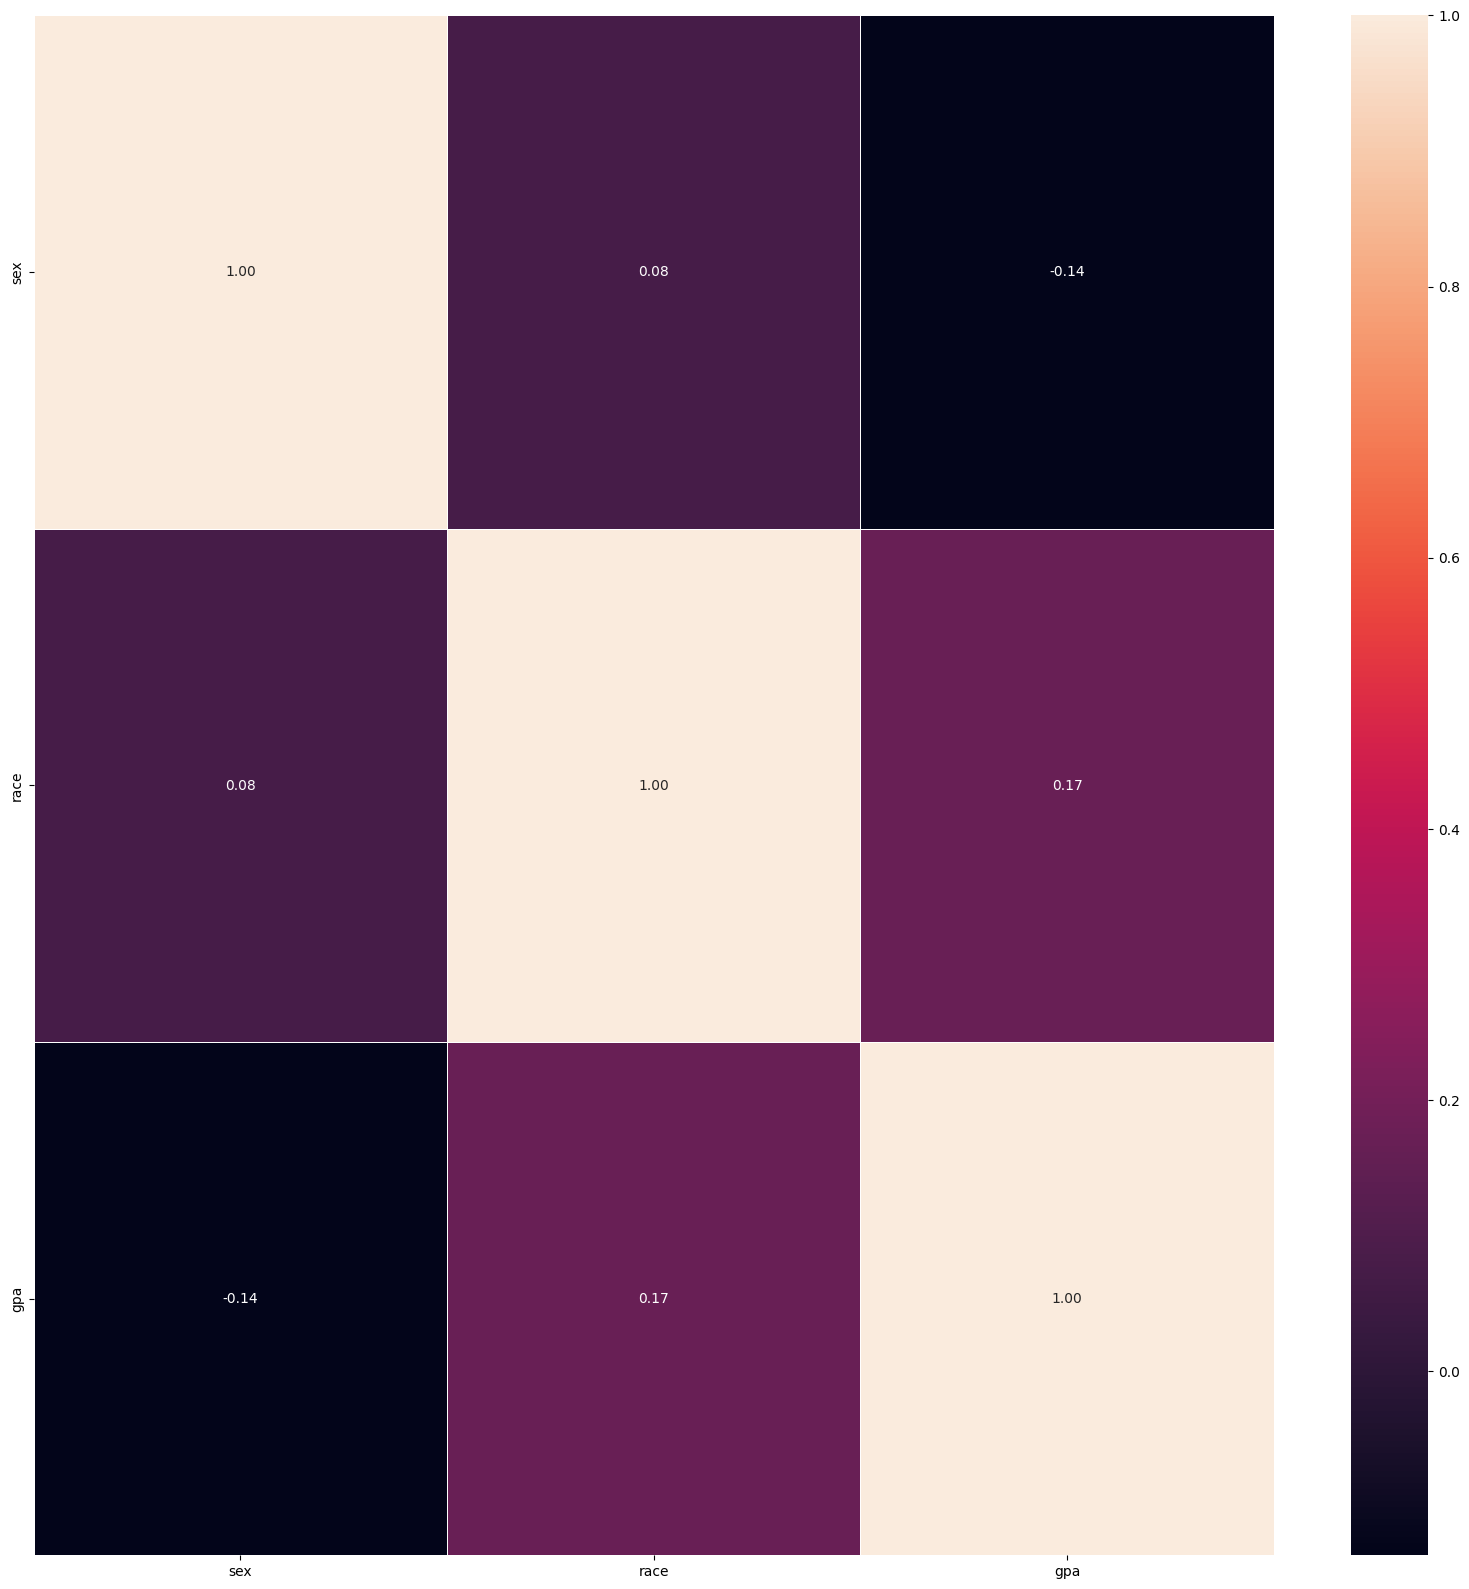

In [7]:
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(real_data.corr(numeric_only=True), annot=True, linewidths=.5, fmt= '.2f',ax=ax)
plt.show()

In [8]:
real_data.dtypes

sex     float64
race    float64
gpa     float64
dtype: object

In [9]:
# Define columns to change their data types to categorical
update_categorical_columns = ['sex', 'race']

# Change data types of categorical columns
real_data[update_categorical_columns] = real_data[update_categorical_columns].astype('category')


/var/folders/v8/64zc34sn3b95klfm660085h80000gn/T/ipykernel_73994/1213183297.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_data[update_categorical_columns] = real_data[update_categorical_columns].astype('category')


In [10]:
real_data.dtypes

sex     category
race    category
gpa      float64
dtype: object

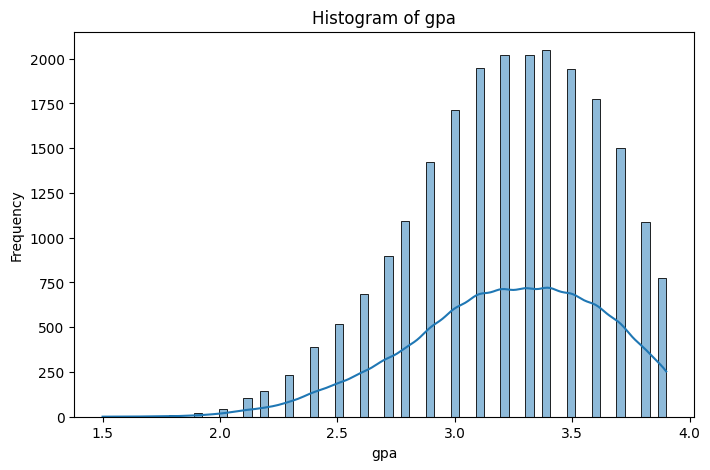

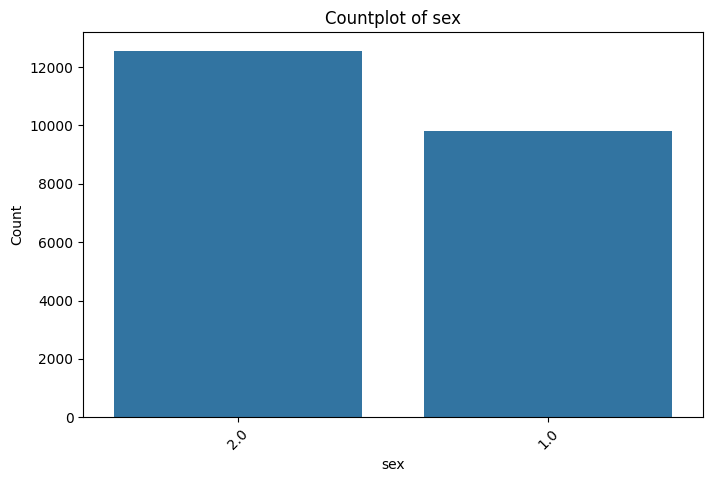

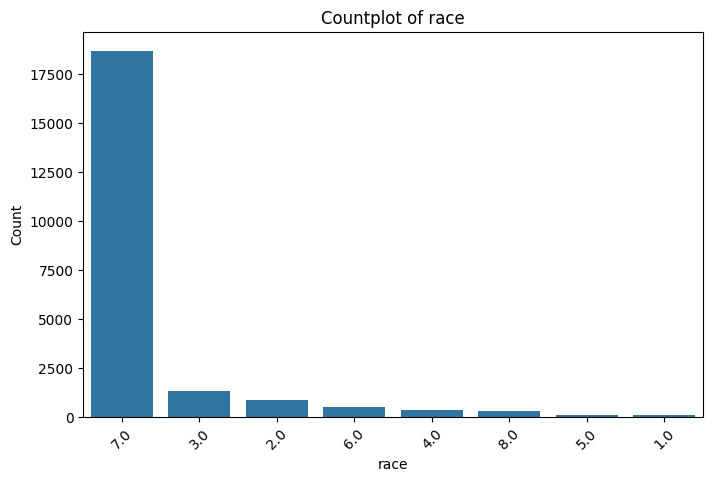

In [11]:
# Select numerical columns
numerical_columns = ['gpa']

# Select categorical or boolean columns
categorical_columns = ['sex', 'race']

# Plot histograms for numerical columns
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(real_data[column].dropna(), kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Plot countplots for categorical or boolean columns
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    if column == 'bar_passed':  # Special handling for boolean column
        sns.countplot(x=column, data=real_data)
    else:
        sns.countplot(x=column, data=real_data, order=real_data[column].value_counts().index)
    plt.title(f'Countplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()

### 4. Gaussian Copula
A copula is a multivariate CDF, with uniform distributed marginals. This means that it encapsulates the joint distribution of the data. Our goal in using a copula for synthetic data generation, is to understand the joint distribution of the data and then generate samples from that joint distribution.

The copula does not assume a specific form for the marginal distributions of each column, and allows us to seperate the estimation of the marginal distributions from that of the joint distribution. It works in two steps:

In a first step, the marginal distribution of each column is estimated, by using a Gaussian kernel density function (gaussian_kde). The samples are then transformed to a uniform distribution by using the probability integral transformation.
In a second step, a joint Gaussian distribution is fitted on the (pseudo) transformed samples.
By using a Gaussian copula, we are making some assumptions about the dependence structure of the data. In particular, regarding tail dependence, and how likely it is to have extreme values for the numeric variables happen at the same time.

Produce the synthetic data using a Gaussian Coupola

#### 4.1 Produce synthetic data using a gaussian copula

In [12]:
real_data.columns.to_list()

['sex', 'race', 'gpa']

In [13]:
# Initialize synthesizer and fit it to the data
synthesizer = GaussianCopulaSynthesizer()
synthesizer.fit(real_data)

In [14]:
# Generate synthetic data
synthetic_data = synthesizer.sample(1000)

# Output some results
print("Original Data (first 5 rows):\n", real_data.head())
print("\nSynthetic Data (first 5 rows):\n", synthetic_data.head())

Original Data (first 5 rows):
    sex race  gpa
0  1.0  7.0  3.5
1  1.0  7.0  3.5
2  2.0  7.0  3.5
3  2.0  7.0  3.5
4  2.0  7.0  3.5

Synthetic Data (first 5 rows):
    sex  race  gpa
0  2.0   7.0  3.3
1  2.0   7.0  2.6
2  1.0   7.0  3.2
3  2.0   7.0  3.0
4  2.0   7.0  3.3


### 5. Evaluating produced synthetic data 

In [15]:
run_diagnostic(real_data, synthetic_data, target_column='gpa')

{'distribution_results': {'sex': {'ks_stat': 0.013736766873632011,
   'p_value': 0.9925848085333805},
  'race': {'ks_stat': 0.07457846071380712, 'p_value': 4.4816365990790774e-05},
  'gpa': {'ks_stat': 0.027463527940322585, 'p_value': 0.4578604664040681}},
 'correlation_diff': 0.03258677504045406}

For numerical columns, The KSComplement returns 1-(KS statistics) where the Kolmogorov Smirnov (KS) statistic is the maximal difference between the CDF of the variable in the original and the synthetic data. A value close to 1 represents a better fit.

For categorical columns, The TVComplement returns 1 - (TV Distance), where the Total Variation Distance measures the relative frequencies of the categories of a given variable in the original and the synthetic data. A value close to 1 represents a better fit